<a href="https://colab.research.google.com/github/Fritz302/data-science/blob/main/FritzK_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Over/Underfitting, Model Visualization, and Model/Variable Selection Concepts

Unlike previous exercises, I won't ask you to code or do mathematical computations.

Instead, these exercises are meant to get you to think about the model and variable selection process.

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo will still show the predictive performance of one model. However, it is mainly used to compare different models.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model not only learns the data, but it also learns the outliers. This makes the data too complex, causing the model to have high variance even though it fits the prior data extremely well.

**Task3**:

How do we mitigate overfitting?

We mitigate overfitting by using a simpler model with less variables, manually simplifying the data, or changing the priors.

**Task4**:

How do we mitigate underfitting?

Using more complex models instead of simple linear models can mitigate underfitting. Using more variables in the priors can also make the model more complicated, fitting the data better.

**Task5**:

Why would we want more than one predictor in a model?

We want  more than one predictor because it creates more accurate, helpful, and complex data sets. Using more than one predictor also increases the power of predictors.

**Task6**:

Can we have too many predictors? How would we now?

Yes, we can have too many predictors. This is shown by the model overfitting. Another problem with too many predictors is that you need a more complex model.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of finding which predictors fit the data the best. elpd_loo is used in variable selection when comparing models. It works as a trial-and-error process that has to adjusted until it fits.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The standard adding of the variables in the model creates a simpler code. This is useful when the model has no change in its variables. The issue with this method is that it ignores interactions between continous and categorical predictors.

Using the categorical variable as a hierarchy upon the other predictor variable is opposite of the standard because you consider that the continous predictor might change based on the categorical variable. This is useful when you think the predictor might change, allowing for variance that the standard model could not handle. However, this method doesn't do a perfect job representing variance, having similar problems to standard models.

Adding the variables plus the categorical variable's interaction with the other variable is by far the most complex method. This solves the main issue from the other two models by allowing the variable and categorical variable to interact when there is variance. This model is strong due to its complexity, which makes it somewhat difficult to read. There are also plenty of oppurtunities for error, like overfitting.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You can't visualize the entire model all at once. However, you can visualize different aspects of the model to show how the model would fit the data. We visualize multiple linear regression models through scatterplots and bar graphs that show separate parts of the model.

**Task10:**

Compare the following linear models that all use the basketball data to predict field goal percentage:

* predictors free throw percentage and position (with position as a categorical predictor)
* predictors free throw percentage and position (with position as a hierarchy)
* predictors free throw percentage and position (with position interacting with frew throw percentage)
* predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
* predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using az.compare() and az.plot_compare(), or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [5]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00


In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [6]:
pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
pos_hier = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


In [8]:
pos_ft = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [9]:
all_3 = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [10]:
pos_3pt = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

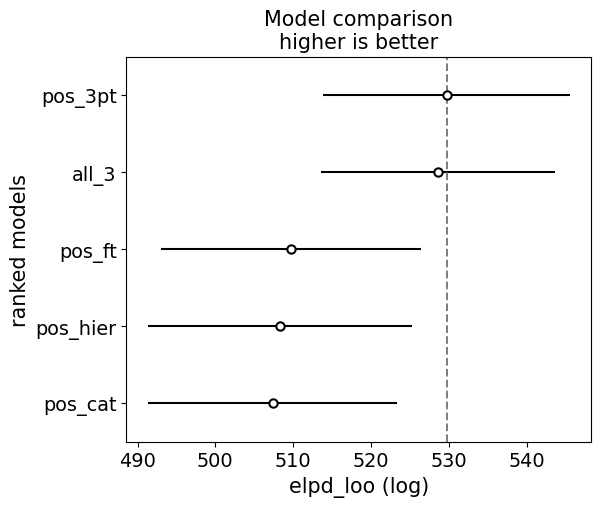

In [11]:
compare = az.compare({"pos_cat":pos_cat, "pos_hier":pos_hier, "pos_ft":pos_ft, "all_3":all_3, "pos_3pt":pos_3pt})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The models that account for interactions (the 4th and 5th one) are most accurate. This is because those models are more reliant on good three point shooters and it can be assumed that a basketball player's three point shooting skills will translate to free throws. My 5th model, which uses an interaction between position and three pointers, is my strongest model. This makes sense, considering basketball players in different positions will have completely different skillsets, including shooting. For example, players who play as centers will not be as good at shooting threes, and thus not make many attempts, compared to point guards. This also translates over to free throws, as some centers have been notorously bad at shooting free throws despite their dominance (cough cough Shaq cough cough).